In [1]:
# imporation basique
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q wordcloud
!pip install -q nltk

In [2]:
# charger le dataset
steam_description = pd.read_csv('../raw_data/steam_description_data.csv')

# Exploration de la donnée

In [3]:
steam_description.head()

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


In [4]:
# vérifier si données manquantes
steam_description.isna().sum()

steam_appid             0
detailed_description    0
about_the_game          0
short_description       0
dtype: int64

In [5]:
# vérifier si présence de doublons
steam_description.duplicated().sum()

0

In [6]:
# colonnes du dataset
steam_description.columns

Index(['steam_appid', 'detailed_description', 'about_the_game',
       'short_description'],
      dtype='object')

In [7]:
# informations
steam_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27334 entries, 0 to 27333
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   steam_appid           27334 non-null  int64 
 1   detailed_description  27334 non-null  object
 2   about_the_game        27334 non-null  object
 3   short_description     27334 non-null  object
dtypes: int64(1), object(3)
memory usage: 854.3+ KB


# Analyse des descriptions

Il y a 3 colonnes description dans la table.

`detailed_description`, `about_the_game` et `short_description` sont sensiblement identiques.

## Application de NLP sur `short_description`

In [8]:
# suppression ponctuation
import string 
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

steam_description['short_description'] = steam_description['short_description'].apply(remove_punctuations)
steam_description['short_description'].head()

0    Play the worlds number 1 online action game En...
1    One of the most popular online action games of...
2    Enlist in an intense brand of Axis vs Allied t...
3    Enjoy fastpaced multiplayer gaming with Deathm...
4    Return to the Black Mesa Research Facility as ...
Name: short_description, dtype: object

In [9]:
# conversion en minuscule
def lower_case(text):
    text = text.lower()
    return text

steam_description['short_description'] = steam_description['short_description'].apply(lower_case)
steam_description['short_description'].head()

0    play the worlds number 1 online action game en...
1    one of the most popular online action games of...
2    enlist in an intense brand of axis vs allied t...
3    enjoy fastpaced multiplayer gaming with deathm...
4    return to the black mesa research facility as ...
Name: short_description, dtype: object

In [10]:
# suppression des nombres
def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text
steam_description['short_description'] = steam_description['short_description'].apply(remove_numbers)
steam_description['short_description'].head()

0    play the worlds number  online action game eng...
1    one of the most popular online action games of...
2    enlist in an intense brand of axis vs allied t...
3    enjoy fastpaced multiplayer gaming with deathm...
4    return to the black mesa research facility as ...
Name: short_description, dtype: object

In [11]:
# suppression des stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
  
def remove_stop_words(text):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(text) 
  
    text = [w for w in word_tokens if not w in stop_words]

    return text

steam_description['short_description'] = steam_description['short_description'].apply(remove_stop_words)
steam_description['short_description'].head()

0    [play, worlds, number, online, action, game, e...
1    [one, popular, online, action, games, time, te...
2    [enlist, intense, brand, axis, vs, allied, tea...
3    [enjoy, fastpaced, multiplayer, gaming, deathm...
4    [return, black, mesa, research, facility, one,...
Name: short_description, dtype: object

In [12]:
# lemmatizer
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    lemmatizer = WordNetLemmatizer() 
    
    lemmatized = ' '.join(lemmatizer.lemmatize(word) for word in text)
    
    text = lemmatized
    
    return text

steam_description['short_description'] = steam_description['short_description'].apply(lemmatize)
steam_description['short_description'].head()

0    play world number online action game engage in...
1    one popular online action game time team fortr...
2    enlist intense brand axis v allied teamplay se...
3    enjoy fastpaced multiplayer gaming deathmatch ...
4    return black mesa research facility one milita...
Name: short_description, dtype: object

In [13]:
# vectorisation des mots
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(steam_description['short_description'])
short_des_transformed = cv.transform(steam_description['short_description'])

In [14]:
# vectorisation des mots (les 100 mots les plus fréquents)
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(stop_words = 'english', min_df = 5, max_features = 100)
#cv.fit(steam_description['short_description'])
#short_des_transformed = cv.transform(steam_description['short_description'])

In [15]:
# extraire les informations et création du DataFrame
short_des_vectorized = pd.DataFrame(columns = cv.get_feature_names_out(), 
                                    data = short_des_transformed.toarray())
short_des_vectorized.head()

,aa,aaa,aaaaa,aaaaaargh,aaki,aarcade,aardman,aarklash,aaron,aarpg,...,魔法技術が発展していく中,麴义的先登兵团和高顺的陷阵营等三国英雄在幻想版中都有机会加入玩家的阵营,黄昏下的教室,黑厂,黑暗下的假面,黒閖,신기록,ﬁghts,ａｅｓｔｈｅｔｉｃ,ａｒｅｎａ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# compter l'occurence de chaque mot
tokens = short_des_vectorized.sum(axis = 0).sort_values(ascending = False)
tokens

game         13364
world         5384
player        2929
puzzle        2866
new           2852
             ...  
kero             1
kerfuffle        1
kerbals          1
kerbal           1
ａｒｅｎａ            1
Length: 39945, dtype: int64

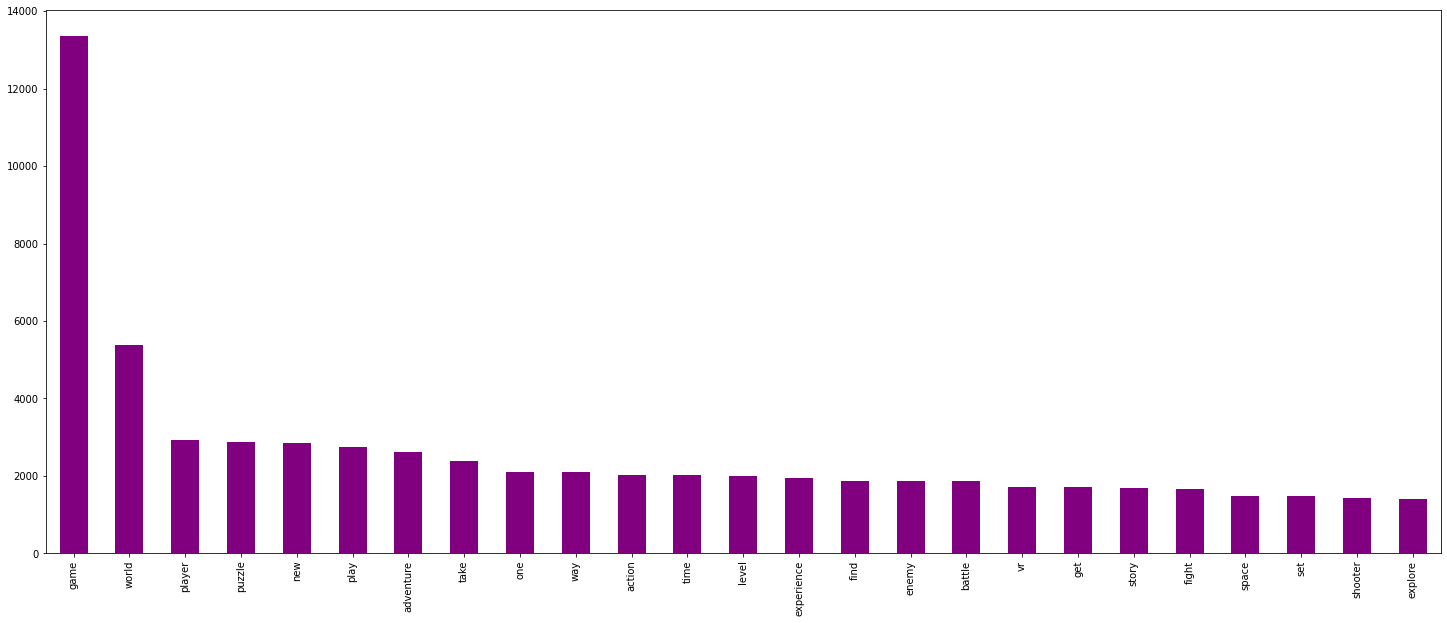

In [17]:
tokens.head(25).plot(kind='bar',figsize=(25,10), color='purple');

In [18]:
# joindre les mots en une seule chaine de caractères
tokens_str = ' '.join(tokens.head(100).index)
tokens_str

'game world player puzzle new play adventure take one way action time level experience find enemy battle vr get story fight space set shooter explore life friend unique classic make different control character help strategy build first rpg multiplayer use war weapon like must arcade challenge survive save platformer skill need fun mode gameplay city hero become combat back monster based power style go many journey place survival online virtual simple element around try collect evil girl secret escape create planet mysterious team challenging dungeon dark alien year series full solve horror two using system reality best discover fast fantasy'

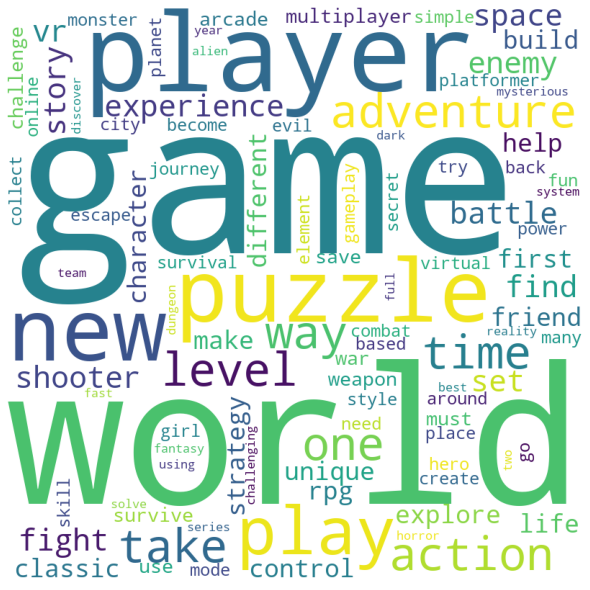

In [19]:
# création d'un WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tokens_str)
 
# afficher le WordCloud image                     
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Création d'un csv contenant steam_appid et les mots vectorisés

In [20]:
steam_description = pd.read_csv('../raw_data/steam_description_data.csv')

In [21]:
short_des_vectorized['steam_appid'] = steam_description['steam_appid']

In [22]:
final_df = short_des_vectorized[['steam_appid'] + [ col for col in short_des_vectorized.columns if col != 'steam_appid']]


In [23]:
final_df.head()

,steam_appid,aa,aaa,aaaaa,aaaaaargh,aaki,aarcade,aardman,aarklash,aaron,...,魔法技術が発展していく中,麴义的先登兵团和高顺的陷阵营等三国英雄在幻想版中都有机会加入玩家的阵营,黄昏下的教室,黑厂,黑暗下的假面,黒閖,신기록,ﬁghts,ａｅｓｔｈｅｔｉｃ,ａｒｅｎａ
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#final_df.to_csv(r'../raw_data/word_vectorized.csv', index = False)